In [2]:
%%capture
#It's generally form to use jupyter magic like this, I apologize if this messes up your
#environment. But; needs must when the devil drives.
%pip install real-simple-seismic
%pip install s3fs==0.5.0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from time import time

from rss.client import rssFromS3

In [4]:
# it's better to keep keys in your environment rather than hard code them here:
client_kwargs = {'aws_access_key_id':'ABC...', 
                    'aws_secret_access_key':'XYZ...'}
rss = rssFromS3('geophysics-on-cloud/poseidon/seismic/rss/psdn11_TbsdmF_Near_Nov_11_32bit', 
                client_kwargs)

Connection complete.


In [5]:
%%capture
# load these individually to save memory
horizons = ['water_bottom', 'top_heywood', 'top_johnson', 'top_jameison', 'top_near_plover']
horizon_data = {}
for key in horizons:
    horizon_data[key] = pd.read_csv(
        f's3://geophysics-on-cloud/poseidon/horizons/{key}.csv.gz', 
                              compression='gzip', index_col=[0,1])

In [6]:
well_data = pd.read_json(
   path_or_buf='s3://geophysics-on-cloud/poseidon/wells/poseidon_geoml_training_wells.json.gz',
   compression='gzip')
well_data.set_index(['well_id', 'twt'], inplace=True)

Elapsed Time (loading) :  0.5959742069244385
Elapsed Time (loading):  0.6947846412658691
Elapsed Time (caching):  0.09334588050842285


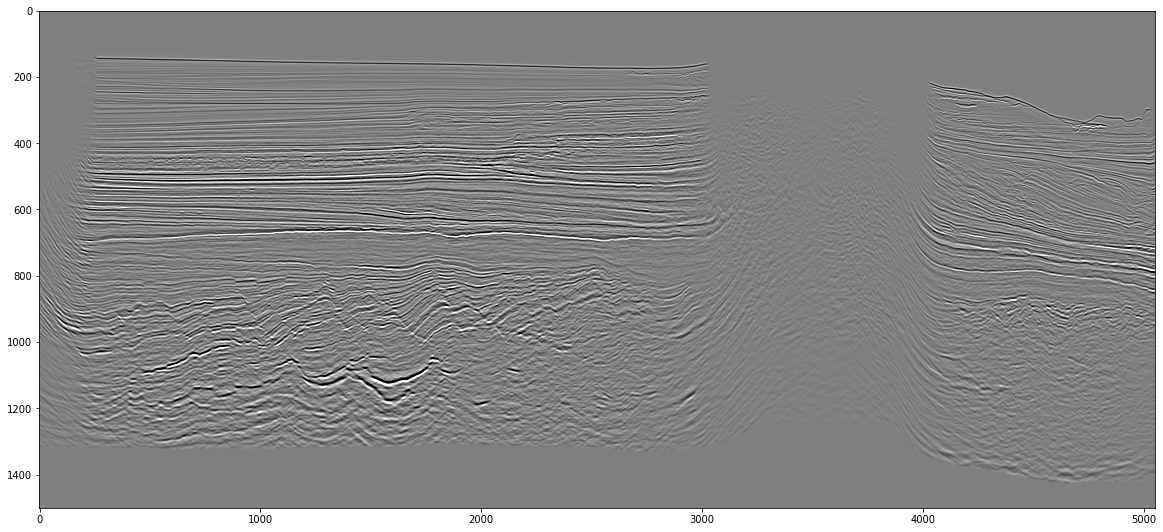

In [7]:
st = time()
inline, mask = rss.line(2002, sort_order='inline')
print ("Elapsed Time (loading) : ", time() - st)

st = time()
inline, mask = rss.line(2003, sort_order='inline')
print ("Elapsed Time (loading): ", time() - st)

st = time()
inline, mask = rss.line(2002, sort_order='inline')
print ("Elapsed Time (caching): ", time() - st)

plt.figure(figsize=(20,20))
plt.imshow(inline, cmap='gray', 
           interpolation='bicubic',
           aspect=1.5,
           vmin=-2*np.std(inline[~mask]), vmax=2*np.std(inline[~mask]))
plt.show()

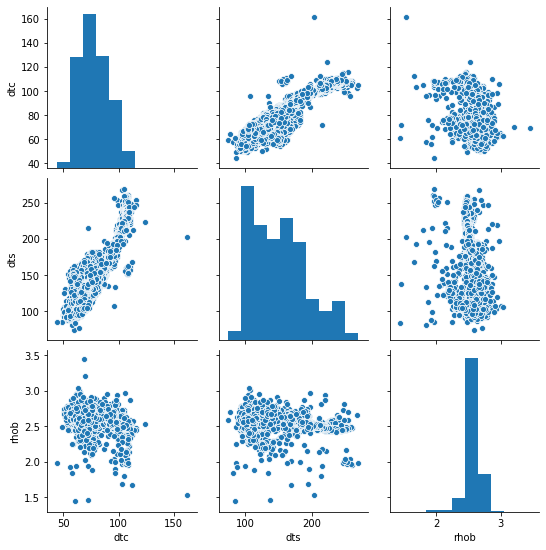

In [8]:
import seaborn as sns
sns.pairplot(well_data[['dtc', 'dts', 'rhob']])

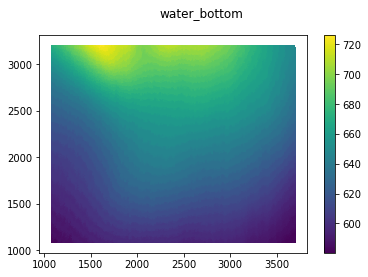

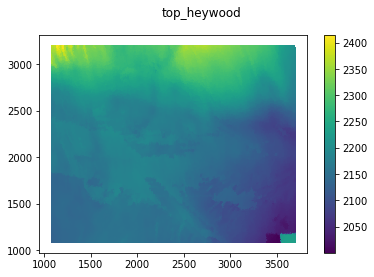

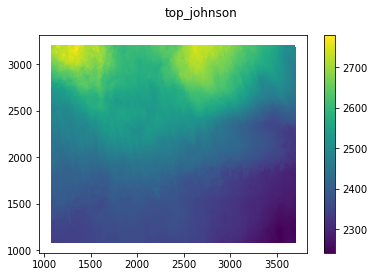

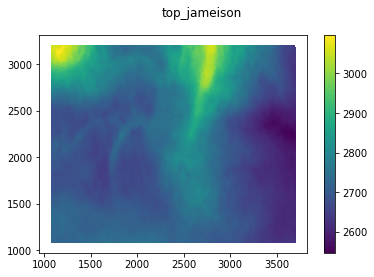

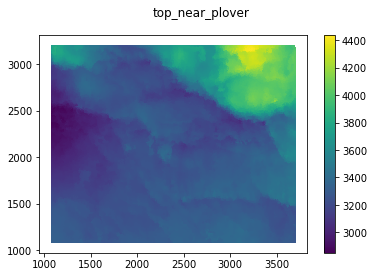

In [9]:
for key, val in horizon_data.items():
    plt.figure()
    plt.suptitle(key)
    plt.tripcolor(
        val.index.get_level_values(0)[::50].values,
        val.index.get_level_values(1)[::50].values,
        val.values[::50,0],
    )
    plt.colorbar()